### TIME EVOLUTION OF THE PERFORMANCE FOR DIFFERENT POINTS IN THE PHASE MAP

In [197]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [198]:
zones = ['III_to_IV', 'III', 'IV', 'I', 'II', 'II_to_III', 'I_to_II', 'IV_to_I', 'IV_alt']
times = range(2,22,2)
accuracies = {}

In [200]:
for zone in zones:
    accuracies[zone] = []
    for t in times:
        data_train = np.load(f'X_train_TN_10000_time_{t}_zone={zone}.npz')
        data_test = np.load(f'X_test_TN_5000_time_{t}_zone={zone}.npz')
        X_train = data_train['x']
        y_train = data_train['y']

        X_test = data_test['x']
        y_test = data_test['y']


        X_train_flat = np.array([sublist for sublist in X_train])
        X_train_flat = X_train_flat.reshape(X_train_flat.shape[0], X_train_flat.shape[1], )

        X_test_flat = np.array([sublist for sublist in X_test])
        X_test_flat = X_test_flat.reshape(X_test_flat.shape[0], X_test_flat.shape[1], )

        scaler = StandardScaler()
        X_train = scaler.fit_transform(np.real(np.array(X_train_flat)))
        X_test = scaler.transform(np.real(np.array(X_test_flat)))

        clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
        clf.fit(X_train, y_train)

        y_class = clf.predict(X_test)
        accuracy = np.sum(y_class == y_test) / len(y_test)
        accuracies[zone].append(accuracy)

In [201]:
X_train = np.load(f'X_train_TN_10000_time_0.npz')['x']
y_train = np.load(f'X_train_TN_10000_time_0.npz')['y']

X_test = np.load(f'X_test_TN_5000_time_0.npz')['x']
y_test = np.load(f'X_test_TN_5000_time_0.npz')['y']


X_train_flat = np.array([sublist for sublist in X_train])
X_train_flat = X_train_flat.reshape(X_train_flat.shape[0], X_train_flat.shape[1], )

X_test_flat = np.array([sublist for sublist in X_test])
X_test_flat = X_test_flat.reshape(X_test_flat.shape[0], X_test_flat.shape[1], )

scaler = StandardScaler()
X_train = scaler.fit_transform(np.real(np.array(X_train_flat)))
X_test = scaler.transform(np.real(np.array(X_test_flat)))

clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=10000)
clf.fit(X_train, y_train)

y_class = clf.predict(X_test)
accuracy = np.sum(y_class == y_test) / len(y_test)
accuracies['no evolve'] = [accuracy]*10

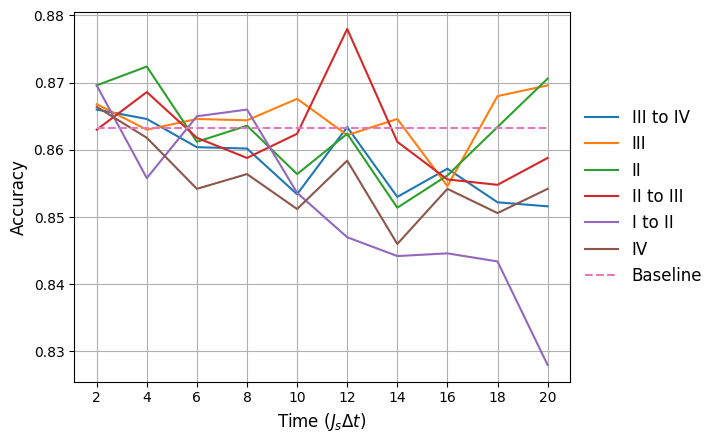

In [253]:
import matplotlib.pyplot as plt

plt.plot(times, accuracies['III_to_IV'], label='III to IV')
plt.plot(times, accuracies['III'], label='III')
#plt.plot(times, accuracies['IV'], label='IV')
#plt.plot(times, accuracies['I'], label='I')
plt.plot(times, accuracies['II'], label='II')
plt.plot(times, accuracies['II_to_III'], label='II to III')
plt.plot(times, accuracies['I_to_II'], label='I to II')
plt.plot(times, accuracies['IV_alt'], label='IV')
#plt.plot(times, accuracies['IV_to_I'], label='IV to I')
plt.plot(times, accuracies['no evolve'], label='Baseline', linestyle='--')
plt.xlabel(r'$ \text{Time}\ (J_s\Delta t)$', fontsize=12)
plt.xticks(times)
plt.ylabel('Accuracy', fontsize=12)
#plt.title('Time evolution of the performance for different points in the phase map')
plt.legend(fontsize=12, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.savefig('performance_te')


### ACCURACY OF TENSOR NETWORK TIME EVOLUTION VS EXACT DIAGONALIZATION

In [1]:
from tools import *

2025-06-28 17:56:32.890440: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-28 17:56:32.898114: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-28 17:56:32.912952: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751126192.944696   46099 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751126192.955022   46099 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751126192.984573   46099 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [11]:
x_vector, _, _, _ = get_mnis_data(1,0)

Zone II to III

### Bucle de gráficas

In [229]:
## First localized area
h_I = 20
W_I = 2000
## Third localized area
h_III = 0.2
W_III = 0.2
## Second ergodic area
h_II = 2
W_II = 100
## Fourth ergodic area
h_IV = 2000
W_IV = 0.2

h_IV_alt = 20
W_IV_alt = 0.2

## Transition I -> II
h_I_to_II = 2
W_I_to_II = 200
## Transition II -> III
h_II_to_III = 2
W_II_to_III = 10
# Transition III -> IV
h_III_to_IV = 10
W_III_to_IV = 2
# Transition IV -> I
h_IV_to_I = 200
W_IV_to_I = 200
# Transition II -> IV
h_II_to_IV = 20
W_II_to_IV = 20


zones = {
    'IV_alt': (h_IV_alt, W_IV_alt),
    'III_to_IV': (h_III_to_IV, W_III_to_IV),
    'III': (h_III, W_III),
    'IV': (h_IV, W_IV),
    'I': (h_I, W_I),
    'II': (h_II, W_II),
    'II_to_III': (h_II_to_III, W_II_to_III),
    'I_to_II': (h_I_to_II, W_I_to_II),
    'IV_to_I': (h_IV_to_I, W_IV_to_I)
    #'II_to_IV': (h_II_to_IV, W_II_to_IV)
}

In [ ]:
for zone_name, (h, W) in zones:
    n=10
    model_params = {"lattice": "Chain",
                    "L": n,
                    "bc_MPS": "finite",
                    "bc_x": "periodic",
                    "Js": 20,
                    "W": W,
                    "h": h,
                    "N": n
                    }
    hamiltonian = CustomHamiltonian(model_params)

Archivo 'mean_rel_err.txt' generado correctamente.
Archivo 'mean_rel_err.txt' generado correctamente.
Archivo 'mean_rel_err.txt' generado correctamente.
Archivo 'mean_rel_err.txt' generado correctamente.
Archivo 'mean_rel_err.txt' generado correctamente.
Archivo 'mean_rel_err.txt' generado correctamente.
Archivo 'mean_rel_err.txt' generado correctamente.
Archivo 'mean_rel_err.txt' generado correctamente.
Archivo 'mean_rel_err.txt' generado correctamente.


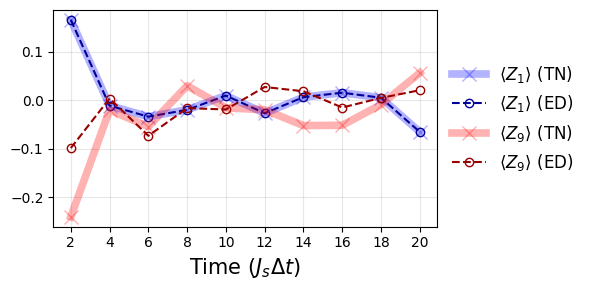

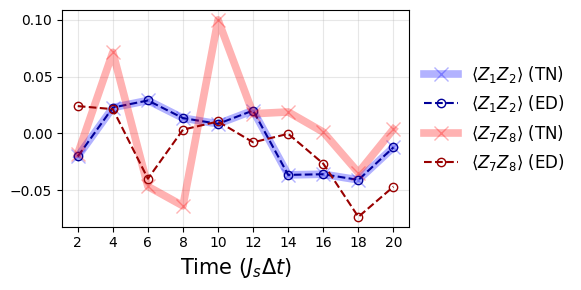

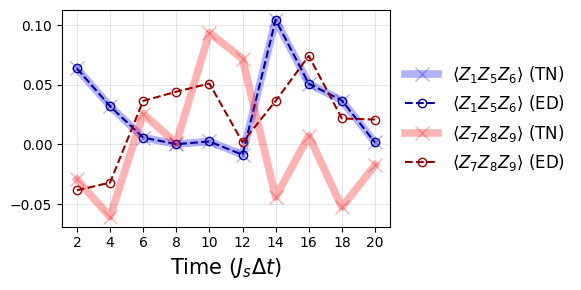

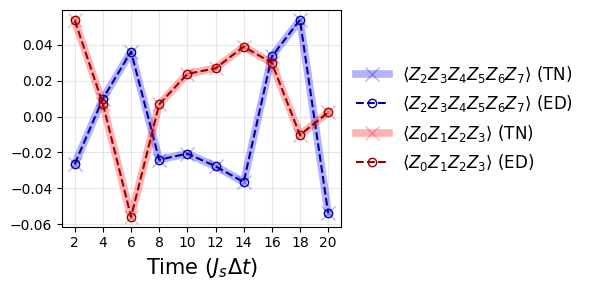

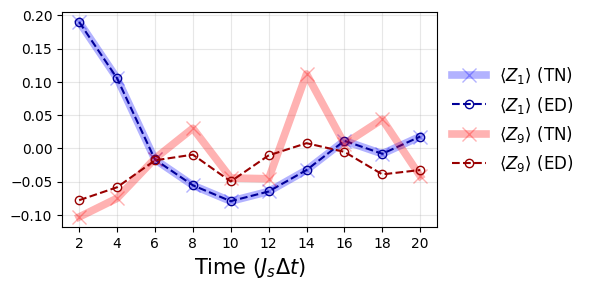

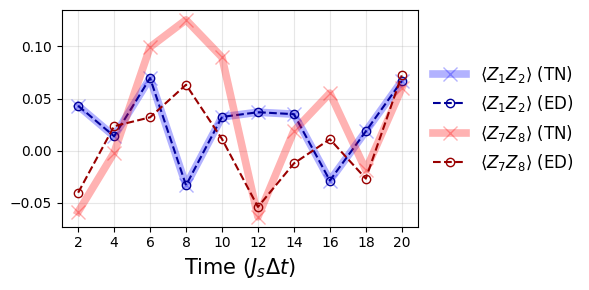

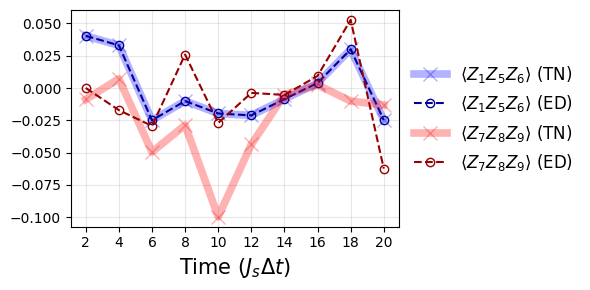

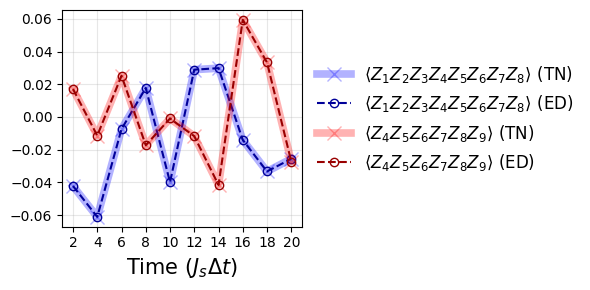

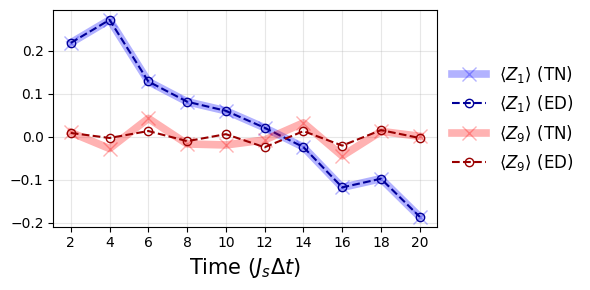

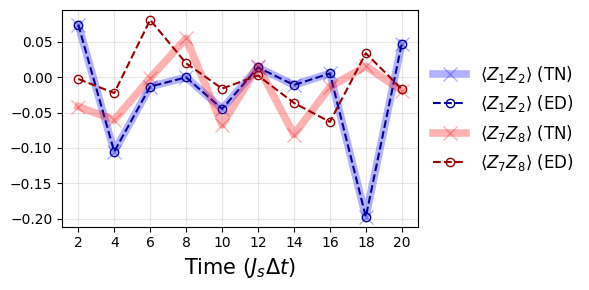

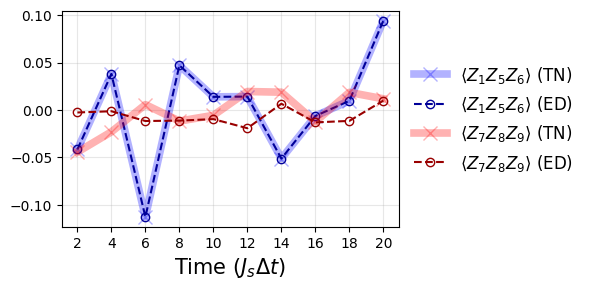

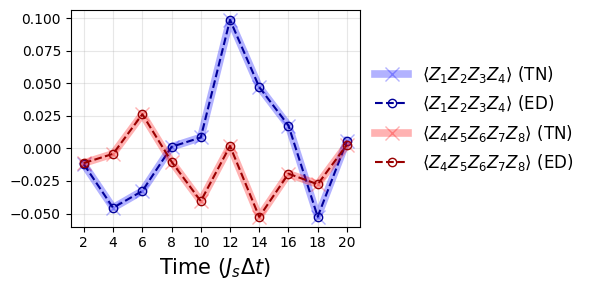

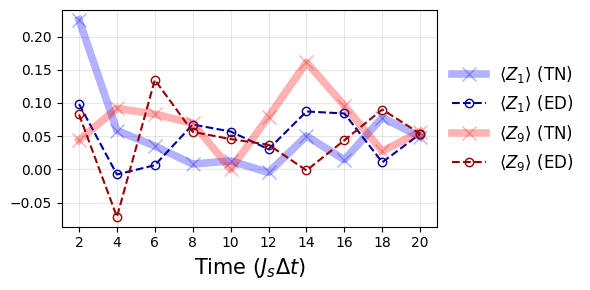

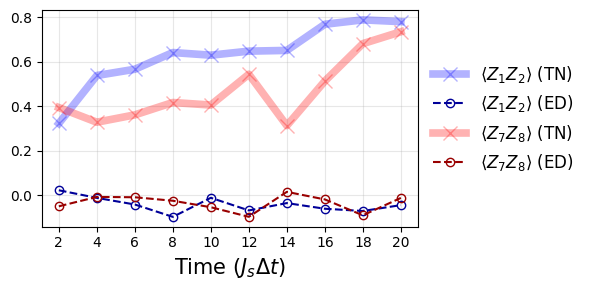

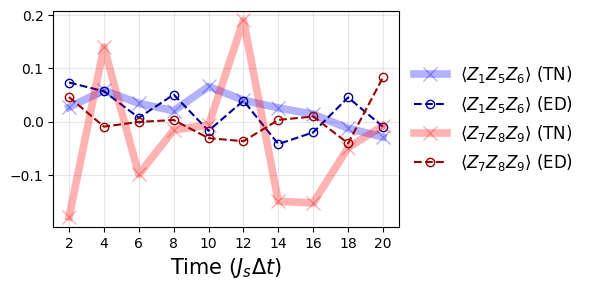

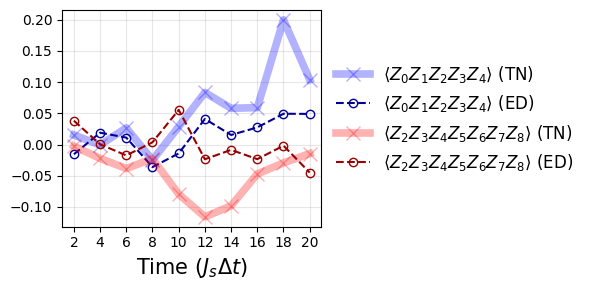

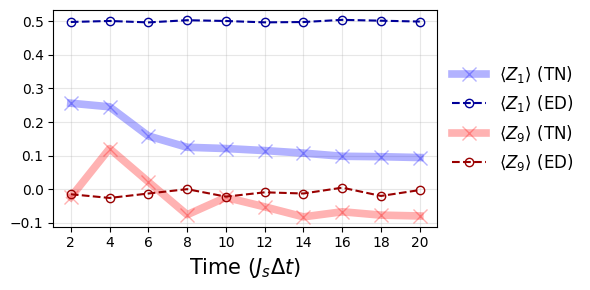

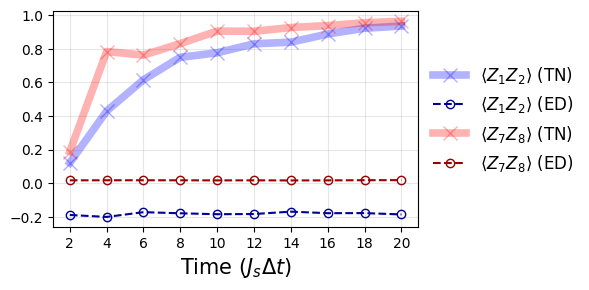

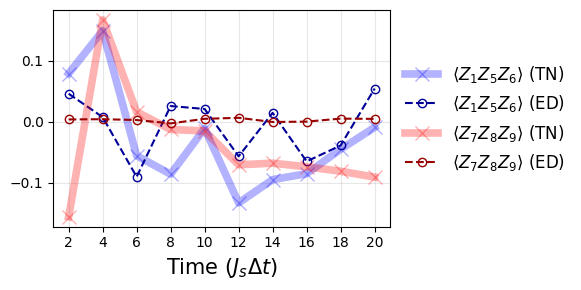

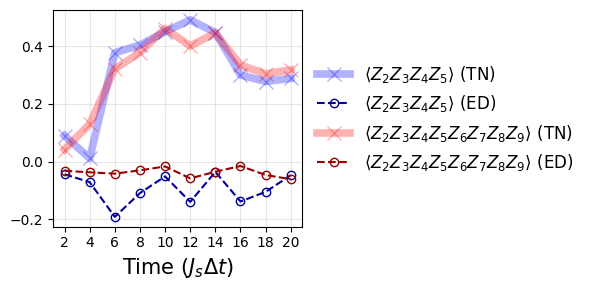

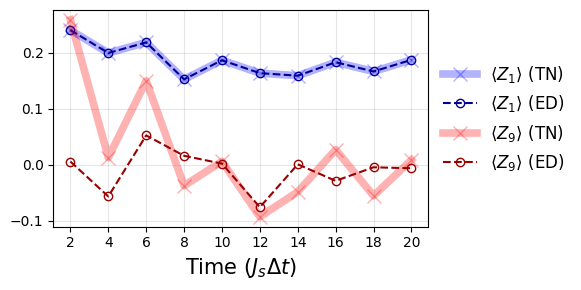

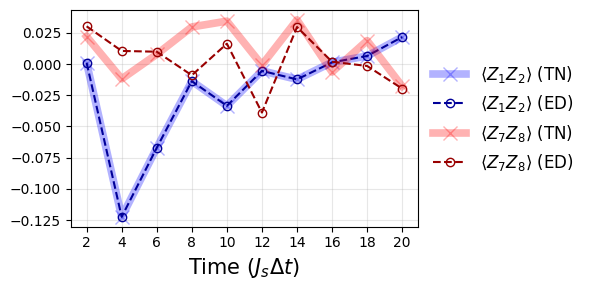

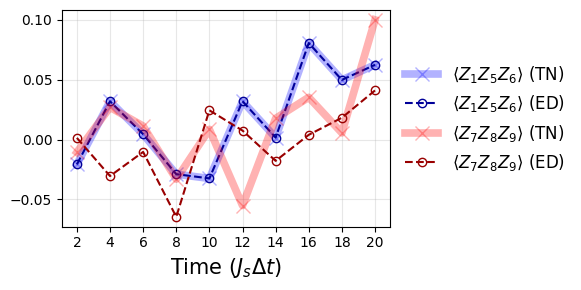

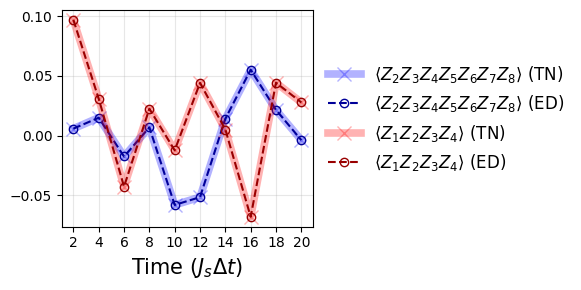

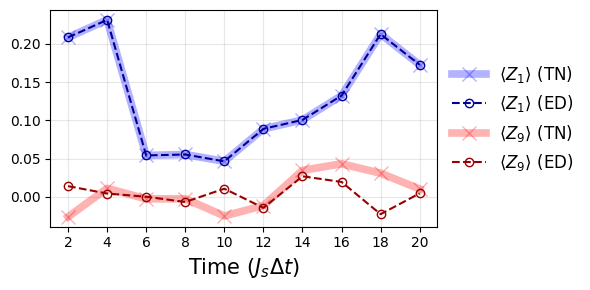

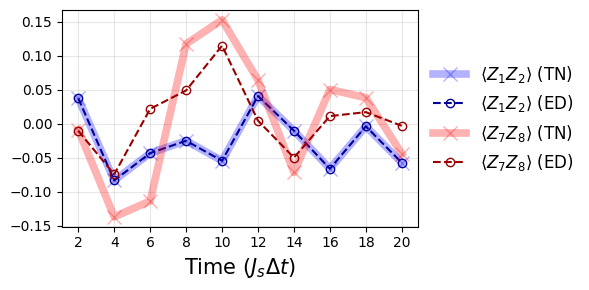

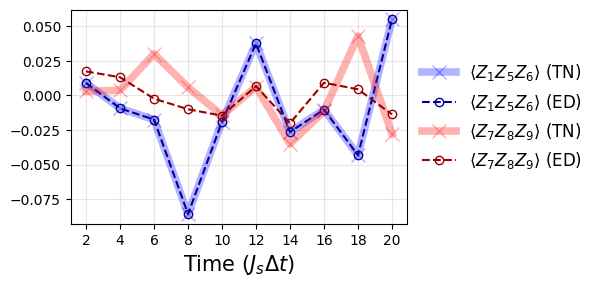

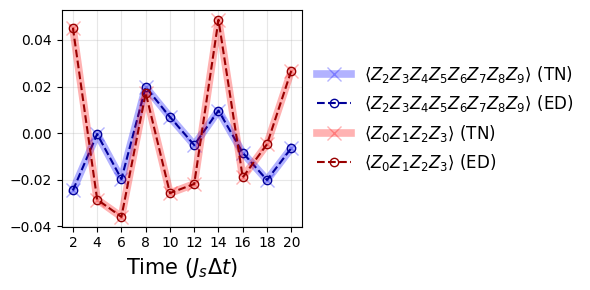

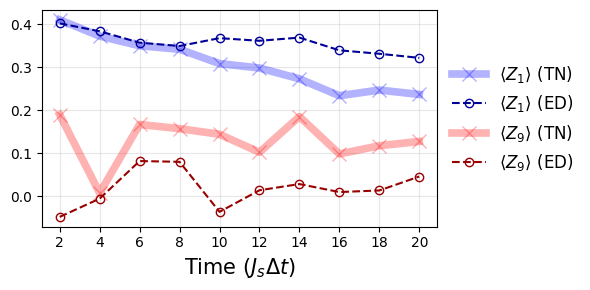

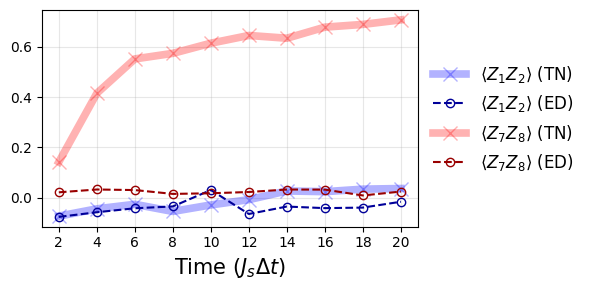

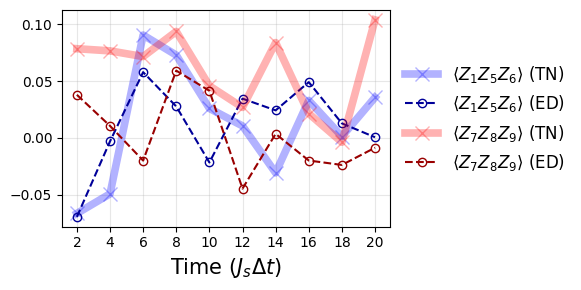

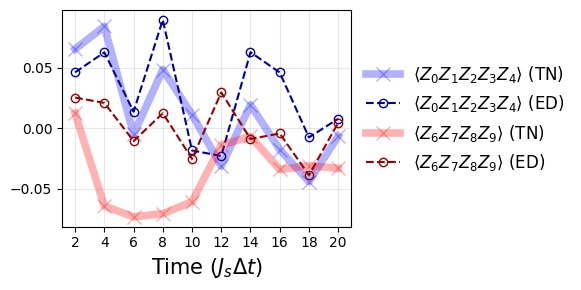

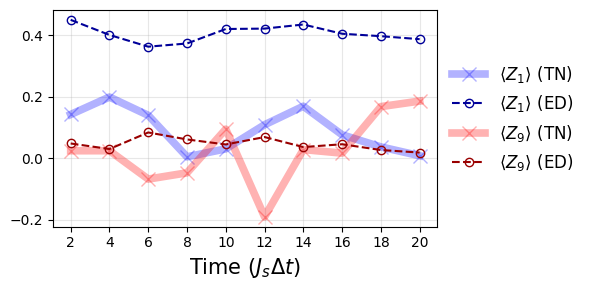

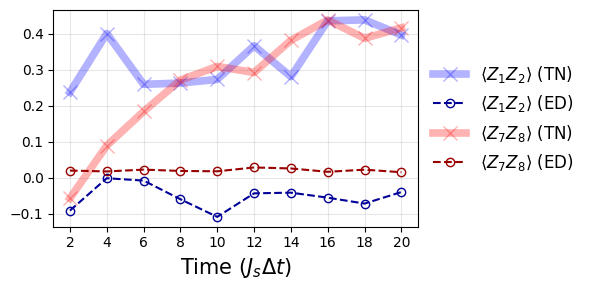

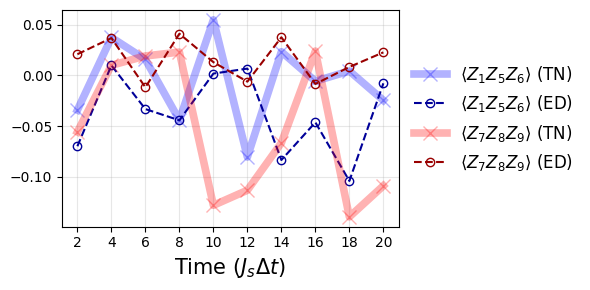

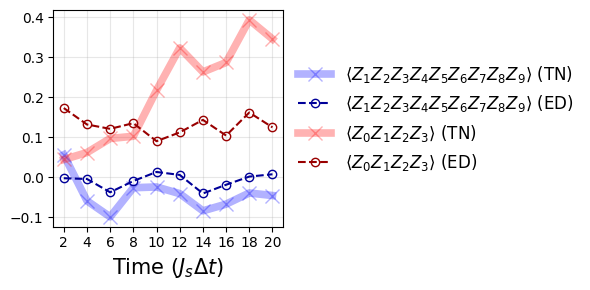

In [244]:
for zone_name, (h, W) in zip(zones.keys(), zones.values()):
    n=10
    model_params = {"lattice": "Chain",
                    "L": n,
                    "bc_MPS": "finite",
                    "bc_x": "periodic",
                    "Js": 20,
                    "W": W,
                    "h": h,
                    "N": n
                    }
    hamiltonian = CustomHamiltonian(model_params)

    state = get_state(x_vector[0], 10)
    features_dic_ED = {}
    for j in range(1, 11):
        state = evolucion_rho(hamiltonian.J, hamiltonian.D, hamiltonian.h, dt=0.1, state=state, energy=False)

        features_dic_ED[2*j] = ([np.array(state.full().conj().T@z_i(n,i)@state.full()).reshape(1,) for i in range(n)] + 
            
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+1)@state.full()).reshape(1,) for i in range(n-1)] + 
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+2)@state.full()).reshape(1,) for i in range(n-2)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+3)@state.full()).reshape(1,) for i in range(n-3)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +

            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@state.full()).reshape(1,) for i in range(n-2)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@state.full()).reshape(1,) for i in range(n-3)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@z_i(n,i+6)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@z_i(n,i+6)@z_i(n,i+7)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@z_i(n,i+6)@z_i(n,i+7)@z_i(n,i+8)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +

            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] + 
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] +

            #[np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] + 
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +  

            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+5)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +   

            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+5)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+6)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +  

            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+5)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+6)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+7)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +   

            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+5)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+6)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+7)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
            [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+8)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] 

            )
        features_dic_TN = {}
    for t in np.linspace(2, 20, 10):
        features_dic_TN[t] = np.load(f'X_train_TN_10000_time_{int(t)}_zone={zone_name}.npz')['x'][0]

    import matplotlib.pyplot as plt
    import numpy as np
    import random
    from matplotlib.colors import to_rgb

    # Lista de tiempos
    tiempos = sorted(features_dic_TN.keys())
    num_features = len(features_dic_TN[tiempos[0]])

    # Reinicio de listas por claridad
    one_body_indices = []
    two_body_indices = []
    three_body_indices = []
    more_body_indices = []

    labels = []
    idx = 0

    # 1. Un cuerpo: ⟨Z_i⟩
    for i in range(10):
        labels.append(rf'$\langle Z_{{{i}}} \rangle$')
        one_body_indices.append(idx)
        idx += 1

    # 2. Dos cuerpos: ⟨Z_i Z_{i+d}⟩
    for d in range(1, 10):
        for i in range(10 - d):
            labels.append(rf'$\langle Z_{{{i}}} Z_{{{i + d}}} \rangle$')
            two_body_indices.append(idx)
            idx += 1

    # 3. Correladores consecutivos de 3 a 10 operadores
    for k in range(2, 10):  # k+1 operadores
        for i in range(10 - k):
            terms = [rf'Z_{{{i + j}}}' for j in range(k + 1)]
            label = r'$\langle ' + ' '.join(terms) + r' \rangle$'
            if k + 1 == 3:
                three_body_indices.append(idx)
            else:
                more_body_indices.append(idx)
            labels.append(label)
            idx += 1

    # 4. Correladores no consecutivos tipo ⟨Z_i Z_{i+x} Z_{i+y}⟩ — siempre 3 operadores
    triplets = [
        (1, 4), (2, 4), (3, 4),
        (2, 5), (3, 5), (4, 5),
        (1, 6), (2, 6), (3, 6), (4, 6), (5, 6),
        (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7),
        (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8),
        (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)
    ]

    for x, y in triplets:
        for i in range(10 - max(x, y)):
            label = rf'$\langle Z_{{{i}}} Z_{{{i + x}}} Z_{{{i + y}}} \rangle$'
            labels.append(label)
            three_body_indices.append(idx)
            idx += 1

    # Validación
    assert idx == num_features, f"Esperaba {num_features}, pero generé {idx} etiquetas"

    # Lista de colores distinguibles
    color_list = ['blue', 'red', 'orange', 'purple', 'teal', 'brown', 'cyan', 'magenta', 'gold', 'darkgreen']

    # Función para oscurecer un color RGB
    def darken_color(color_name, factor=0.6):
        rgb = np.array(to_rgb(color_name))
        return tuple(rgb * factor)

    # Función para graficar grupo de correladores (2 aleatorios)
    def plot_random_subset(indices, title):
        selected = random.sample(indices, 2)
        plt.figure(figsize=(10, 5))

        for i, idx in enumerate(selected):
            base_color = color_list[i % len(color_list)]
            dark_color = darken_color(base_color)

            y_TN = [features_dic_TN[t][idx] for t in tiempos]
            y_ED = [features_dic_ED[t][idx] for t in tiempos]

            plt.plot(
                tiempos, y_TN,
                label=f'{labels[idx]} (TN)',
                color=base_color,
                linestyle='solid',
                marker='x',
                alpha=0.3,
                linewidth=5.5,
                markersize=10
            )

            plt.plot(
                tiempos, y_ED,
                label=f'{labels[idx]} (ED)',
                color=dark_color,
                marker='o',
                linestyle='--',
                markerfacecolor='none',
                linewidth=1.5
            )

        plt.title(title)
        plt.xlabel(r'$ \text{Time}\ (J_s\Delta t)$')
        plt.xticks(range(2, 22, 2))
        plt.ylabel(r'$ \langle Z_i Z_j Z_k \rangle $')
        plt.legend(fontsize=8)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    # Función para graficar grupo de correladores (aleatorios o específicos)
    def plot_subset(indices, title, indices_to_plot=None):
        if indices_to_plot is not None:
            selected = indices_to_plot
        else:
            selected = random.sample(indices, 2)

        plt.figure(figsize=(6, 3))

        for i, idx in enumerate(selected):
            base_color = color_list[i % len(color_list)]
            dark_color = darken_color(base_color)

            y_TN = [features_dic_TN[t][idx] for t in tiempos]
            y_ED = [features_dic_ED[t][idx] for t in tiempos]

            plt.plot(
                tiempos, y_TN,
                label=f'{labels[idx]} (TN)',
                color=base_color,
                linestyle='solid',
                marker='x',
                alpha=0.3,
                linewidth=5.5,
                markersize=10
            )

            plt.plot(
                tiempos, y_ED,
                label=f'{labels[idx]} (ED)',
                color=dark_color,
                marker='o',
                linestyle='--',
                markerfacecolor='none',
                linewidth=1.5
            )

        #plt.title(title)
        plt.xlabel(r'$ \text{Time}\ (J_s\Delta t)$', fontsize=15)
        plt.xticks(range(2, 22, 2))
        #plt.ylabel(r'$ \langle Z_i Z_j Z_k \rangle $', fontsize=15)
        plt.legend(fontsize=12, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'graficas/zone{zone_name}/{title.replace(" ", "_").replace("body", "bdy")}.png')

    # Generar gráficas con 2 correladores por grupo
    plot_subset(one_body_indices, '1 body correlators', [1,9])
    plot_subset(two_body_indices, '2 body correlators', [11, 17])
    plot_subset(three_body_indices, '3 body correlators', [120, 62])
    plot_subset(more_body_indices, '4 or more body correlators')

    # Lista de tiempos ordenados
    tiempos = sorted(features_dic_TN.keys())

    # Función para calcular el error relativo promedio temporal de un grupo de índices
    def calcular_error_relativo_promedio(indices):
        errores_relativos = []

        for idx in indices:
            valores_ED = np.array([features_dic_ED[t][idx] for t in tiempos])
            valores_TN = np.array([features_dic_TN[t][idx] for t in tiempos])

            # Evitar divisiones por cero
            with np.errstate(divide='ignore', invalid='ignore'):
                error_relativo = np.abs(valores_TN - valores_ED) / np.where(np.abs(valores_ED) > 1e-12, np.abs(valores_ED), np.nan)

            # Filtramos NaNs (por valores de ED muy pequeños o cero)
            error_relativo = error_relativo[~np.isnan(error_relativo)]

            if len(error_relativo) > 0:
                promedio = np.mean(error_relativo)
                errores_relativos.append(promedio)

        # Promedio total del grupo
        return np.mean(errores_relativos)

    # Cálculo de errores para cada grupo
    error_1cuerpo = calcular_error_relativo_promedio(one_body_indices)
    error_2cuerpos = calcular_error_relativo_promedio(two_body_indices)
    error_3cuerpos = calcular_error_relativo_promedio(three_body_indices)
    error_4omas = calcular_error_relativo_promedio(more_body_indices)

    # Crear tabla en LaTeX
    latex_table = r"""
    \begin{table}[h!]
    \centering
    \begin{tabular}{l c}
    \hline
    Tipo de correlador & Error relativo promedio \\
    \hline
    1 body correlators           & %.4f \\
    2 body correlators          & %.4f \\
    3 body correlators          & %.4f \\
    4 body correlators    & %.4f \\
    \hline
    \end{tabular}
    \caption{Errores relativos promedios temporales entre TN y ED para distintos tipos de correladores.}
    \label{tab:mean_rel_err}
    \end{table}
    """ % (error_1cuerpo, error_2cuerpos, error_3cuerpos, error_4omas)

    # Guardar en archivo .txt
    with open(f"graficas/zone{zone_name}/mean_rel_err.txt", "w") as f:
        f.write(latex_table)

    print("Archivo 'mean_rel_err.txt' generado correctamente.")



In [216]:
state = get_state(x_vector[0], 10)
features_dic_ED = {}
for j in range(1, 11):
    state = evolucion_rho(hamiltonian.J, hamiltonian.D, hamiltonian.h, dt=0.1, state=state, energy=False)

    features_dic_ED[2*j] = ([np.array(state.full().conj().T@z_i(n,i)@state.full()).reshape(1,) for i in range(n)] + 
        
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+1)@state.full()).reshape(1,) for i in range(n-1)] + 
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+2)@state.full()).reshape(1,) for i in range(n-2)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+3)@state.full()).reshape(1,) for i in range(n-3)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +

        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@state.full()).reshape(1,) for i in range(n-2)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@state.full()).reshape(1,) for i in range(n-3)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@z_i(n,i+6)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@z_i(n,i+6)@z_i(n,i+7)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+2)@z_i(n,i+3)@z_i(n,i+4)@z_i(n,i+5)@z_i(n,i+6)@z_i(n,i+7)@z_i(n,i+8)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +

        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] + 
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+4)@state.full()).reshape(1,) for i in range(n-4)] +

        #[np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] + 
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+5)@state.full()).reshape(1,) for i in range(n-5)] +  

        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+5)@z_i(n,i+6)@state.full()).reshape(1,) for i in range(n-6)] +   

        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+5)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+6)@z_i(n,i+7)@state.full()).reshape(1,) for i in range(n-7)] +  

        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+5)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+6)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+7)@z_i(n,i+8)@state.full()).reshape(1,) for i in range(n-8)] +   

        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+1)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+2)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+3)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+4)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+5)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+6)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+7)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] +
        [np.array(state.full().conj().T@z_i(n,i)@z_i(n, i+8)@z_i(n,i+9)@state.full()).reshape(1,) for i in range(n-9)] 

        )

In [217]:
features_dic_TN = {}
for t in np.linspace(2, 20, 10):
    features_dic_TN[t] = np.load(f'X_train_TN_10000_time_{int(t)}_zone=IV_alt.npz')['x'][0]

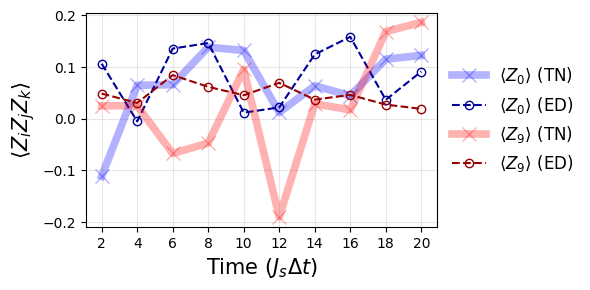

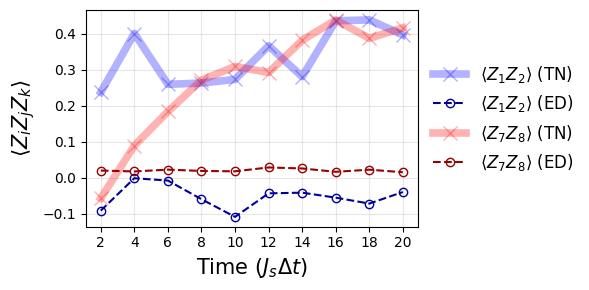

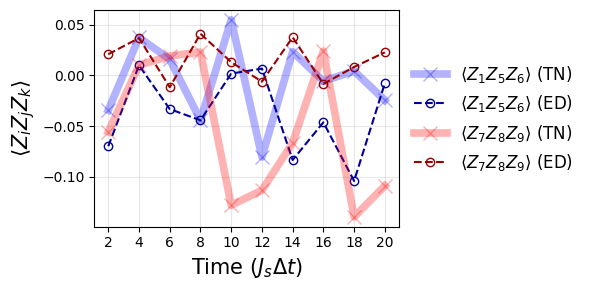

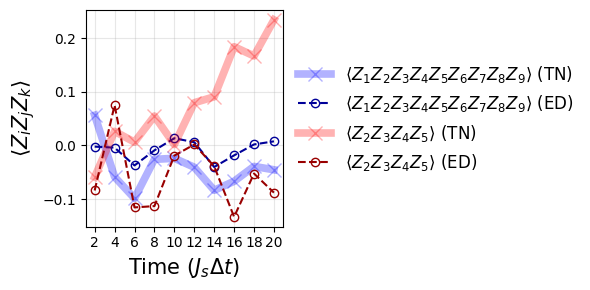

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from matplotlib.colors import to_rgb

# Lista de tiempos
tiempos = sorted(features_dic_TN.keys())
num_features = len(features_dic_TN[tiempos[0]])

# Reinicio de listas por claridad
one_body_indices = []
two_body_indices = []
three_body_indices = []
more_body_indices = []

labels = []
idx = 0

# 1. Un cuerpo: ⟨Z_i⟩
for i in range(10):
    labels.append(rf'$\langle Z_{{{i}}} \rangle$')
    one_body_indices.append(idx)
    idx += 1

# 2. Dos cuerpos: ⟨Z_i Z_{i+d}⟩
for d in range(1, 10):
    for i in range(10 - d):
        labels.append(rf'$\langle Z_{{{i}}} Z_{{{i + d}}} \rangle$')
        two_body_indices.append(idx)
        idx += 1

# 3. Correladores consecutivos de 3 a 10 operadores
for k in range(2, 10):  # k+1 operadores
    for i in range(10 - k):
        terms = [rf'Z_{{{i + j}}}' for j in range(k + 1)]
        label = r'$\langle ' + ' '.join(terms) + r' \rangle$'
        if k + 1 == 3:
            three_body_indices.append(idx)
        else:
            more_body_indices.append(idx)
        labels.append(label)
        idx += 1

# 4. Correladores no consecutivos tipo ⟨Z_i Z_{i+x} Z_{i+y}⟩ — siempre 3 operadores
triplets = [
    (1, 4), (2, 4), (3, 4),
    (2, 5), (3, 5), (4, 5),
    (1, 6), (2, 6), (3, 6), (4, 6), (5, 6),
    (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7),
    (1, 8), (2, 8), (3, 8), (4, 8), (5, 8), (6, 8), (7, 8),
    (1, 9), (2, 9), (3, 9), (4, 9), (5, 9), (6, 9), (7, 9), (8, 9)
]

for x, y in triplets:
    for i in range(10 - max(x, y)):
        label = rf'$\langle Z_{{{i}}} Z_{{{i + x}}} Z_{{{i + y}}} \rangle$'
        labels.append(label)
        three_body_indices.append(idx)
        idx += 1

# Validación
assert idx == num_features, f"Esperaba {num_features}, pero generé {idx} etiquetas"

# Lista de colores distinguibles
color_list = ['blue', 'red', 'orange', 'purple', 'teal', 'brown', 'cyan', 'magenta', 'gold', 'darkgreen']

# Función para oscurecer un color RGB
def darken_color(color_name, factor=0.6):
    rgb = np.array(to_rgb(color_name))
    return tuple(rgb * factor)

# Función para graficar grupo de correladores (2 aleatorios)
def plot_random_subset(indices, title):
    selected = random.sample(indices, 2)
    plt.figure(figsize=(10, 5))

    for i, idx in enumerate(selected):
        base_color = color_list[i % len(color_list)]
        dark_color = darken_color(base_color)

        y_TN = [features_dic_TN[t][idx] for t in tiempos]
        y_ED = [features_dic_ED[t][idx] for t in tiempos]

        plt.plot(
            tiempos, y_TN,
            label=f'{labels[idx]} (TN)',
            color=base_color,
            linestyle='solid',
            marker='x',
            alpha=0.3,
            linewidth=5.5,
            markersize=10
        )

        plt.plot(
            tiempos, y_ED,
            label=f'{labels[idx]} (ED)',
            color=dark_color,
            marker='o',
            linestyle='--',
            markerfacecolor='none',
            linewidth=1.5
        )

    plt.title(title)
    plt.xlabel(r'$ \text{Time}\ (J_s\Delta t)$')
    plt.xticks(range(2, 22, 2))
    plt.ylabel(r'$ \langle Z_i Z_j Z_k \rangle $')
    plt.legend(fontsize=8)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Función para graficar grupo de correladores (aleatorios o específicos)
def plot_subset(indices, title, indices_to_plot=None):
    if indices_to_plot is not None:
        selected = indices_to_plot
    else:
        selected = random.sample(indices, 2)

    plt.figure(figsize=(6, 3))

    for i, idx in enumerate(selected):
        base_color = color_list[i % len(color_list)]
        dark_color = darken_color(base_color)

        y_TN = [features_dic_TN[t][idx] for t in tiempos]
        y_ED = [features_dic_ED[t][idx] for t in tiempos]

        plt.plot(
            tiempos, y_TN,
            label=f'{labels[idx]} (TN)',
            color=base_color,
            linestyle='solid',
            marker='x',
            alpha=0.3,
            linewidth=5.5,
            markersize=10
        )

        plt.plot(
            tiempos, y_ED,
            label=f'{labels[idx]} (ED)',
            color=dark_color,
            marker='o',
            linestyle='--',
            markerfacecolor='none',
            linewidth=1.5
        )

    #plt.title(title)
    plt.xlabel(r'$ \text{Time}\ (J_s\Delta t)$', fontsize=15)
    plt.xticks(range(2, 22, 2))
    plt.ylabel(r'$ \langle Z_i Z_j Z_k \rangle $', fontsize=15)
    plt.legend(fontsize=12, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Generar gráficas con 2 correladores por grupo
plot_subset(one_body_indices, '1 body correlators', [0,9])
plot_subset(two_body_indices, '2 body correlators', [11, 17])
plot_subset(three_body_indices, '3 body correlators', [120, 62])
plot_subset(more_body_indices, '4 or more body correlators')

import numpy as np




In [221]:
import numpy as np

# Lista de tiempos ordenados
tiempos = sorted(features_dic_TN.keys())

# Función para calcular el error relativo promedio temporal de un grupo de índices
def calcular_error_relativo_promedio(indices):
    errores_relativos = []

    for idx in indices:
        valores_ED = np.array([features_dic_ED[t][idx] for t in tiempos])
        valores_TN = np.array([features_dic_TN[t][idx] for t in tiempos])

        # Evitar divisiones por cero
        with np.errstate(divide='ignore', invalid='ignore'):
            error_relativo = np.abs(valores_TN - valores_ED) / np.where(np.abs(valores_ED) > 1e-12, np.abs(valores_ED), np.nan)

        # Filtramos NaNs (por valores de ED muy pequeños o cero)
        error_relativo = error_relativo[~np.isnan(error_relativo)]

        if len(error_relativo) > 0:
            promedio = np.mean(error_relativo)
            errores_relativos.append(promedio)

    # Promedio total del grupo
    return np.mean(errores_relativos)

# Cálculo de errores para cada grupo
error_1cuerpo = calcular_error_relativo_promedio(one_body_indices)
error_2cuerpos = calcular_error_relativo_promedio(two_body_indices)
error_3cuerpos = calcular_error_relativo_promedio(three_body_indices)
error_4omas = calcular_error_relativo_promedio(more_body_indices)

# Crear tabla en LaTeX
latex_table = r"""
\begin{table}[h!]
\centering
\begin{tabular}{l c}
\hline
Tipo de correlador & Error relativo promedio \\
\hline
1 body correlators           & %.4f \\
2 body correlators          & %.4f \\
3 body correlators          & %.4f \\
4 body correlators    & %.4f \\
\hline
\end{tabular}
\caption{Errores relativos promedios temporales entre TN y ED para distintos tipos de correladores.}
\label{tab:mean_rel_err}
\end{table}
""" % (error_1cuerpo, error_2cuerpos, error_3cuerpos, error_4omas)

# Guardar en archivo .txt
with open("mean_rel_err.txt", "w") as f:
    f.write(latex_table)

print("Archivo 'mean_rel_err.txt' generado correctamente.")

Archivo 'mean_rel_err.txt' generado correctamente.


### Learning speed (amount of images) for different times and different zones

In [181]:
for zone in zones:
    accuracies[zone] = {}
    for t in times:
        accuracies[zone][t] = []
        data_train = np.load(f'X_train_TN_10000_time_{t}_zone={zone}.npz')
        data_test = np.load(f'X_test_TN_5000_time_{t}_zone={zone}.npz')

        X_train = data_train['x']
        y_train = data_train['y']

        X_test = data_test['x']
        y_test = data_test['y']


        X_train_flat = np.array([sublist for sublist in X_train])
        X_train_flat = X_train_flat.reshape(X_train_flat.shape[0], X_train_flat.shape[1], )

        X_test_flat = np.array([sublist for sublist in X_test])
        X_test_flat = X_test_flat.reshape(X_test_flat.shape[0], X_test_flat.shape[1], )

        scaler = StandardScaler()
        X_train = scaler.fit_transform(np.real(np.array(X_train_flat)))
        X_test = scaler.transform(np.real(np.array(X_test_flat)))

        for i in np.linspace(1000, 10000, 10):
            clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
            clf.fit(X_train[:int(i)], y_train[:int(i)])

            y_class = clf.predict(X_test)
            accuracy = np.sum(y_class == y_test) / len(y_test)
            accuracies[zone][t].append(accuracy)

KeyboardInterrupt: 

In [190]:
zones

['III_to_IV',
 'III',
 'IV',
 'I',
 'II',
 'II_to_III',
 'I_to_II',
 'IV_to_I',
 'IV_alt']

ValueError: x and y must have same first dimension, but have shapes (10,) and (1,)

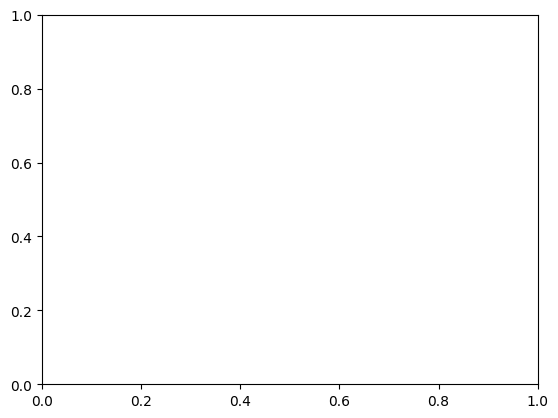

In [192]:
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][2], label='t = 2')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][4], label='t = 4')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][6], label='t = 6')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][8], label='t = 8')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][10], label='t = 10')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][12], label='t = 12')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][14], label='t = 14')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][16], label='t = 16')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][18], label='t = 18')
plt.plot(np.linspace(1000, 10000, 10), accuracies['III'][20], label='t = 20')
plt.xlabel(r'training data set size')
plt.legend()
plt.xticks(np.linspace(1000, 10000, 10))
plt.ylabel('Accuracy')
